# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> Problema SPAM, 2019</center>      

### Propuesta
Se plantea un problema de detección de spam para resolver mediante la biblioteca [scikit-learn](https://scikit-learn.org) usando **redes neuronales**. La propuesta es que trabajen en parejas y diseñen la mejor solución posible (el objetivo es maximizar el **accuracy**). Para el desarrollo de la solución hay disponibles dos conjuntos de datos, uno de <b>train</b> y otro de <b>validation</b>. Existe también un conjunto de datos de <b>test</b>, que estará disponible pero sin las etiquetas (ground-truth). La idea es que luego de conseguir la solución final, cada grupo de estudiantes entregue su predicción sobre los datos de test (como un archivo .npy). Esta predicción se evalurá sobre el ground-truth de los datos de test y se publicará un ranking de resultados. Los equipos que obtengan los mejores resultados deberán compartir cómo diseñaron su solución. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Datos de spam
El concepto de "spam" es diverso, e incluye entre otros: anuncios de productos, anuncios de sitios web, esquemas para ganar dinero rápido, cartas en cadena, pornografía, es decir, correo electrónico comercial no solicitado. El conjunto de datos proviene de una colección de correos electrónicos identificados como spam, y de otra colección de mensajes personales y de trabajo. Hay aproximadamente un 40% de correo spam y un 60% de correo no-spam. A partir del texto de los mensajes se calcula una serie de características para discrminiar correo spam de correo no-spam. Dichas características se describen brevemente más adelante. 

A continuación se cargan los conjuntos de datos de entrenamiento, validación y test.

In [2]:
# datos de train
X_train = np.load('./data/spam-X_train.npy')
y_train = np.load('./data/spam-y_train.npy')
# datos de validation
X_val = np.load('./data/spam-X_val.npy')
y_val = np.load('./data/spam-y_val.npy')
# datos de test (sin etiquetas)
X_test = np.load('./data/spam-X_test.npy')

In [3]:
print('Hay %d elementos (%d spams y %d no-spams) en el conjunto de entrenamiento' % (X_train.shape[0], np.sum(y_train==1),np.sum(y_train==0) ) )
print('Hay %d elementos (%d spams y %d no-spams) en el conjunto de validación' % (X_val.shape[0], np.sum(y_val==1),np.sum(y_val==0) ))
print('Hay %d elementos en el conjunto de test (sin etiquetas)' % (X_test.shape[0]))
print('Hay %d características en los datos' % (X_train.shape[1]))

Hay 3000 elementos (1161 spams y 1839 no-spams) en el conjunto de entrenamiento
Hay 700 elementos (292 spams y 408 no-spams) en el conjunto de validación
Hay 901 elementos en el conjunto de test (sin etiquetas)
Hay 57 características en los datos


#### Información sobre las características

Hay un total de 57 características. La mayoría de estos atributos (1-54) indican si una palabra o carácter en particular ocurre frecuentemente en el correo electrónico. Los restantes atributos (55-57) miden la longitud de secuencias de letras mayúsculas consecutivas de distinta forma. Una descripción algo más detallada se presenta a continuación.

 - 48 atributos reales continuos [0,100] de tipo word_freq_WORD = porcentaje de palabras en el correo electrónico que coinciden con WORD, es decir, 100 * (número de veces que la palabra aparece en el correo electrónico) / número total de palabras en el correo electrónico. Una "palabra" en este caso es cualquier cadena de caracteres alfanuméricos delimitada por caracteres no alfanuméricos o el carácter de final de cadena.
 - 6 atributos reales continuos [0,100] de tipo char_freq_CHAR = porcentaje de caracteres en el correo electrónico que coinciden con CHAR, es decir, 100 * (número de ocurrencias de CHAR) / caracteres totales en el correo electrónico
 - 1 atributo real continuo [1, ...] de tipo capital_run_length_average = longitud promedio de secuencias ininterrumpidas de letras mayúsculas
 - 1 atributo entero continuo [1, ...] de tipo capital_run_length_longest = longitud de la secuencia ininterrumpida más larga de letras mayúsculas
 - 1 entero continuo [1, ...] atributo de tipo capital_run_length_total = suma de la longitud de secuencias ininterrumpidas de letras mayúsculas = número total de letras mayúsculas en el correo electrónico
  

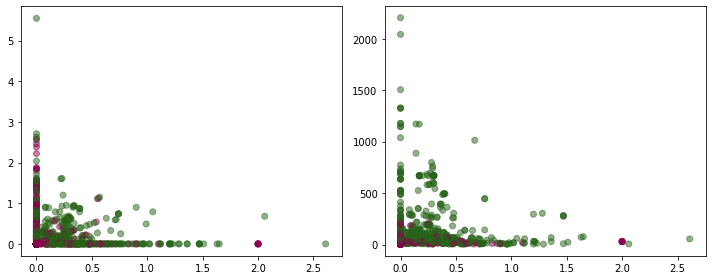

In [4]:
# visualización de los datos
inds = [10, 12, 55]

plt.rcParams['figure.figsize'] = [10, 4]

plt.figure()
plt.subplot(121)
plt.scatter(X_train[:, inds[0]], X_train[:, inds[1]], c=y_train.flatten(), alpha=0.5, cmap='PiYG') 
plt.subplot(122)
plt.scatter(X_train[:, inds[0]], X_train[:, inds[2]], c=y_train.flatten(), alpha=0.5, cmap='PiYG') 
plt.tight_layout()

### Entrenamiento de regresión logística
Se aborda el problema con regresión logística para clasificación.

In [5]:
from sklearn.linear_model import LogisticRegression

# entrenamiento de regresión logística
lr_clf = LogisticRegression(solver='sag', max_iter=10000)
lr_clf.fit(X_train, y_train.flatten())

# predicción en train y validation
y_pred_train = lr_clf.predict(X_train)
y_pred_val = lr_clf.predict(X_val)

# cálculo de desempeño
accuracy_train = np.mean(y_pred_train==y_train.flatten())
print('El accuracy con el conjunto de entrenamiento es %f' % accuracy_train)
accuracy_val = np.mean(y_pred_val==y_val.flatten())
print('El accuracy con el conjunto de validación es %f' % accuracy_val)

El accuracy con el conjunto de entrenamiento es 0.860000
El accuracy con el conjunto de validación es 0.845714


### Entrenamiento de una red neuronal
A continuación se aborda el problema con redes neuronales (MLP, perceptrón multicapa).

In [ ]:
from sklearn.neural_network import MLPClassifier

# entrenamiento de perceptrón multicapa
clf = MLPClassifier(solver='sgd', max_iter=1000, verbose=True)
clf.fit(X_train, y_train.flatten())

# predicción en train y validation
y_pred_val = clf.predict(X_val)
y_pred_train = clf.predict(X_train)

# cálculo de desempeño
accuracy_train = np.mean(y_pred_train==y_train.flatten())
print('El accuracy con el conjunto de entrenamiento es %f' % accuracy_train)
accuracy_val = np.mean(y_pred_val==y_val.flatten())
print('El accuracy con el conjunto de validación es %f' % accuracy_val)

### Sugerencias para explorar

 - **estandarización de características:** es habitual escalar y centrar las características a media cero y varianza unidad ¿resulta ventajoso?
 - **estructura de la red:** ¿cuántas capas ocultas son necesarias? ¿cuál es el número de neuronas en cada capa?
 - **función de activación:** ¿qué función de activación se usa por defecto? ¿es la más apropiada?
 - **learning rate:** ¿cómo se maneja el learning rate? ¿se mantiene un mismo valor constante?
 - **algoritmo de optimización:** ¿hay alguna opción más apropiada que gradiente descendente estocástico (sgd)?
 - **regularización:** ¿es ventajoso usar regularización? ¿cómo podría aplicarse? ¿qué métodos hay disponibles?

#### Estandarización de características

In [ ]:
# probar un escalado y centrado de las características
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

# codigo a completar
